<a href="https://colab.research.google.com/github/Devakathevikas/EXCLR/blob/main/AD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df  = pd.read_csv('Reviews.csv', nrows=500)

df.head(3)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

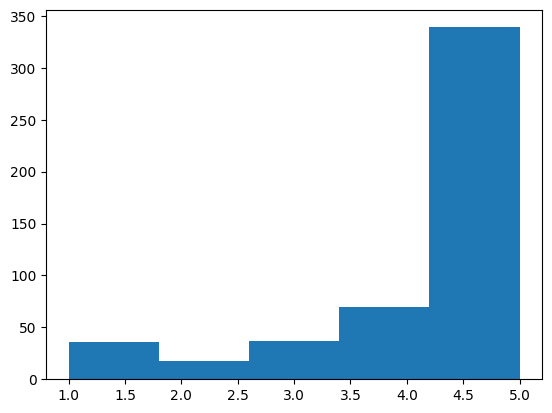

        Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score                                                              
1       36         36      36           36                    36   
2       18         18      18           18                    18   
3       37         37      37           37                    37   
4       70         70      70           70                    70   
5      339        339     339          339                   339   

       HelpfulnessDenominator  Time  Summary  Text  
Score                                               
1                          36    36       36    36  
2                          18    18       18    18  
3                          37    37       37    37  
4                          70    70       70    70  
5                         339   339      339   339  


In [ ]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count())

In [ ]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

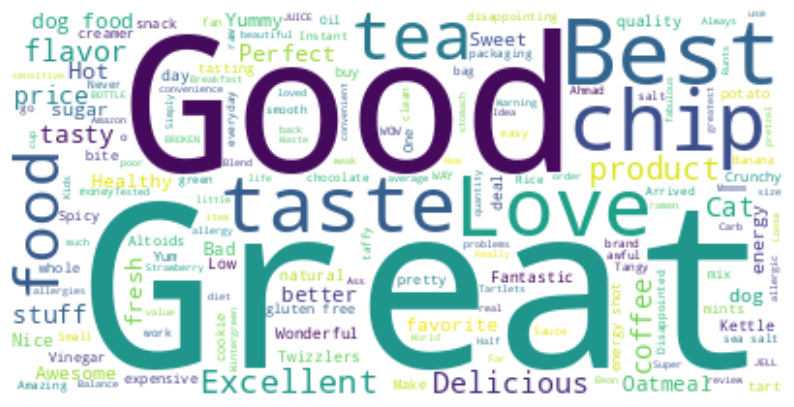

In [ ]:
#lets build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud

# Assuming you want to use all reviews for the wordcloud, replace reviews_sample with reviews
reviews_str = " ".join(reviews["Summary"].to_numpy())

# If you intended to use a specific score subset, replace reviews with the desired subset, e.g., score_1, score_2, etc.
# For example, to use reviews with Score=1:
# reviews_str = " ".join(score_1["Summary"].to_numpy())

wordcloud = WordCloud(background_color="white").generate(reviews_str)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming negative_reviews_str and positive_reviews_str are your preprocessed text data
# containing negative and positive reviews respectively.  Make sure these are strings.

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

# Plot
fig = plt.figure(figsize=(10, 10))  # Adjust figure size as needed

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)

plt.tight_layout()  # Prevents overlapping titles
plt.show()

NameError: name 'negative_reviews_str' is not defined

NameError: name 'negative_reviews_str' is not defined

In [16]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [21]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt  # Import matplotlib

plt.style.use('fivethirtyeight') # Set a visually appealing style for plots

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt  # Import matplotlib

plt.style.use('fivethirtyeight') # Set a visually appealing style for plots

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create an empty list to store sentiment scores
emptyline = []

# Iterate through the 'Text' column of the DataFrame
for row in df['Text']:
    # Get polarity scores for the current text
    vs = analyzer.polarity_scores(row)
    # Append the scores to the list
    emptyline.append(vs)
for row in df['Text']:
    # Get polarity scores for the current text
    vs = analyzer.polarity_scores(row)
    # Append the scores to the list
    emptyline.append(vs)